# Keras - MNIST

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras import backend as K
import numpy as np

Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [4]:
mnist_train_images.shape

(60000, 28, 28)

We need to shape the data differently then before. Since we're treating the data as 2D images of 28x28 pixels instead of a flattened stream of 784 pixels, we need to shape it accordingly. Depending on the data format Keras is set up for, this may be 1x28x28 or 28x28x1 (the "1" indicates a single color channel, as this is just grayscale. If we were dealing with color images, it would be 3 instead of 1 since we'd have red, green, and blue color channels)

In [5]:
K.image_data_format()

'channels_last'

In [6]:
if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Convert our train and test labels to be categorical in one-hot format:

In [7]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

As a sanity check let's print out one of the training images with its label:

In [8]:
def display_sample(num):
    # Print the one-hot array of this sample's label 
    print(train_labels[num])  
    
    # Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    
    # Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


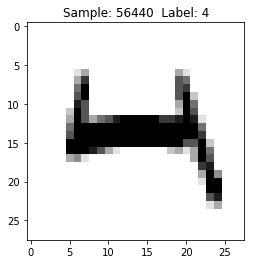

In [9]:
display_sample(np.random.randint(60000))

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))  # 64 3x3 kernels
model.add(MaxPooling2D(pool_size=(2, 2)))         # Reduce by taking the max of each 2x2 block
model.add(Dropout(0.25))

# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels,
                    batch_size=600,
                    epochs=10,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 264s 4ms/step - loss: 0.4524 - acc: 0.8652
Epoch 2/10
60000/60000 [==============================] - 274s 5ms/step - loss: 0.1251 - acc: 0.9636
Epoch 3/10
60000/60000 [==============================] - 268s 4ms/step - loss: 0.0857 - acc: 0.9752
Epoch 4/10
60000/60000 [==============================] - 264s 4ms/step - loss: 0.0687 - acc: 0.9793
Epoch 5/10
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0595 - acc: 0.9817
Epoch 6/10
60000/60000 [==============================] - 265s 4ms/step - loss: 0.0486 - acc: 0.9855
Epoch 7/10
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0445 - acc: 0.9856
Epoch 8/10
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0410 - acc: 0.9875
Epoch 9/10
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0372 - acc: 0.9883
Epoch 10/10
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0353 - a

In [14]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028963799416649273
Test accuracy: 0.9904
